# New set of genes

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib_venn import venn2, venn2_circles
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import decoupler as dc

In [2]:
from pathlib import Path
import os

In [3]:
root_dir = "/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/scenicplus/L4_IT/"
os.chdir(root_dir)
figure_dir = Path("/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/new_summary_20250421/")

In [4]:
rna_object = sc.read_h5ad("L4_IT_rna_matrix.h5ad")
rna_counts = rna_object.raw.to_adata()
rna_region_counts = dc.get_pseudobulk(
    adata=rna_counts,
    sample_col="Region",
    groups_col=None,
    min_cells=0,
    min_counts=0,
    min_prop=0.0,
    min_smpls=0,
    remove_empty=True,
    mode="sum"
)
sc.pp.normalize_total(rna_region_counts, target_sum=1e6)
sc.pp.log1p(rna_region_counts, base=2)
region_align = ["A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C"]

/tscc/nfs/home/biy022/miniconda3/envs/scenicplus/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [5]:
new_genes = [
    "GRIN2A", "GRIN2B", "ATP2B2", "TRPC3", "RYR2", "ITPR2", "PLCB1", "PRKCA", 
    "CAMK2A", "CAMK2B", "PPP3CA", "PPP3CC", "RCAN2", "NFAT5", "CACNA2D2", 
    "CATSPERB", "KLF12", "TCF12", "BACH2"
]

In [6]:
plot_matrix = rna_region_counts[region_align, new_genes].X.T.copy()
row_means = np.mean(plot_matrix, axis=1, keepdims=True)
row_stds = np.std(plot_matrix, axis=1, keepdims=True)
plot_matrix_z = (plot_matrix - row_means) / row_stds

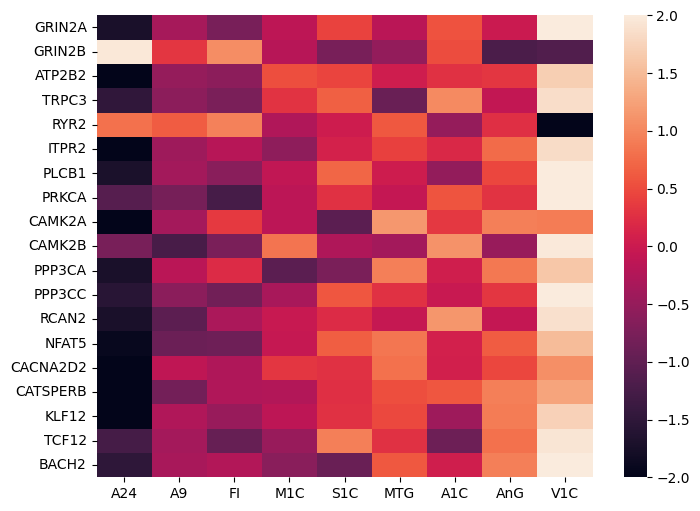

In [7]:
fig, ax = plt.subplots(1, 1)
fig.set_figwidth(8)
fig.set_figheight(6)
sns.heatmap(
    plot_matrix_z,
    xticklabels=region_align,
    yticklabels=new_genes,
    vmin=-2,
    vmax=2,
    ax=ax
)
fig.savefig(figure_dir / "L4IT_RNA.pdf", dpi=300, format="pdf")